Brand Sentiment Analysis Project
=================================

# Contents

## 1. Data Collection from Twitter
## 2. Data Cleaning Process
## 3. Sentiment Analysis
## 4. Report Summary
------------------------------------------------------------------

In [1]:
cd C:\Users\an-user\project_files\social_network_sentment_analysis

C:\Users\an-user\project_files\social_network_sentment_analysis


In [5]:
import twitter
import pandas as pd
import numpy as np
import json
from collections import Counter
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

# 1. Data Collection from Twitter

In [3]:
consumer_key = 'private'
consumer_secret = 'private'
oauth_token = 'private'
oauth_token_secret = 'private'

auth = twitter.oauth.OAuth(oauth_token, 
                           oauth_token_secret,
                           consumer_key,
                           consumer_secret)
                           
twitter_api = twitter.Twitter(auth = auth)

In [95]:
world_woe_id = 1
kr_woe_id = 1132599
US_woe_id = 2458410

world_trends = twitter_api.trends.place(_id = world_woe_id)
us_trends = twitter_api.trends.place(_id = US_woe_id)
kr_trends = twitter_api.trends.place(_id = kr_woe_id)

q = 'bmw'
count = 100
search_results = twitter_api.search.tweets(q = q, count = count)

statuses = search_results['statuses']

for _ in range(25):
    print("Length of Statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError:
        print(search_results['search_metadata'])
        break
    kwargs = dict([kv.split('=') for kv in next_results[1:].split("&")])
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

Length of Statuses 98
Length of Statuses 198
Length of Statuses 298
Length of Statuses 398
Length of Statuses 498
Length of Statuses 596
Length of Statuses 684
Length of Statuses 783
Length of Statuses 883
Length of Statuses 979
Length of Statuses 1076
Length of Statuses 1173
Length of Statuses 1269
Length of Statuses 1344
Length of Statuses 1428
Length of Statuses 1511
Length of Statuses 1605
Length of Statuses 1683
Length of Statuses 1766
Length of Statuses 1866
Length of Statuses 1964
Length of Statuses 2064
Length of Statuses 2164
Length of Statuses 2264
Length of Statuses 2364


In [96]:
q2 = 'benz'
count = 100
search_results2 = twitter_api.search.tweets(q = q2, count = count)

statuses2 = search_results2['statuses']

for _ in range(25):
    print("Length of Statuses", len(statuses2))
    try:
        next_results = search_results2['search_metadata']['next_results']
    except KeyError:
        print(search_results2['search_metadata'])
        break
    kwargs = dict([kv.split('=') for kv in next_results[1:].split("&")])
    search_results2 = twitter_api.search.tweets(**kwargs)
    statuses2 += search_results2['statuses']

Length of Statuses 49
Length of Statuses 127
Length of Statuses 210
Length of Statuses 301
Length of Statuses 377
Length of Statuses 467
Length of Statuses 564
Length of Statuses 642
Length of Statuses 734
Length of Statuses 824
Length of Statuses 899
Length of Statuses 957
Length of Statuses 977
Length of Statuses 1063
Length of Statuses 1143
Length of Statuses 1239
Length of Statuses 1332
Length of Statuses 1417
Length of Statuses 1494
Length of Statuses 1592
Length of Statuses 1683
Length of Statuses 1780
Length of Statuses 1880
Length of Statuses 1974
Length of Statuses 2071


In [97]:
q3 = 'chrysler'
count = 100
search_results3 = twitter_api.search.tweets(q = q3, count = count)

statuses3 = search_results3['statuses']

for _ in range(25):
    print("Length of Statuses", len(statuses3))
    try:
        next_results = search_results3['search_metadata']['next_results']
    except KeyError:
        print(search_results3['search_metadata'])
        break
    kwargs = dict([kv.split('=') for kv in next_results[1:].split("&")])
    search_results3 = twitter_api.search.tweets(**kwargs)
    statuses3 += search_results3['statuses']

Length of Statuses 100
Length of Statuses 200
Length of Statuses 300
Length of Statuses 400
Length of Statuses 500
Length of Statuses 600
Length of Statuses 700
Length of Statuses 797
Length of Statuses 897
Length of Statuses 997
Length of Statuses 1097
Length of Statuses 1197
Length of Statuses 1297
Length of Statuses 1394
Length of Statuses 1494
Length of Statuses 1588
Length of Statuses 1681
Length of Statuses 1779
Length of Statuses 1879
Length of Statuses 1979
Length of Statuses 2079
Length of Statuses 2179
Length of Statuses 2279
Length of Statuses 2379
Length of Statuses 2479


### 1 - (2) Transforming JSON data into dataframe for further analysis 

In [143]:
group1_user_id, group1_screen_name,group1_created_time, group1_id_created_time, group1_id_created_time = [], [], [], [], []
group1_followers_count, group1_friends_count, group1_status_texts, group1_lang = [], [], [], []



for status in statuses:
    group1_user_id.append(status['user']['id'])
    group1_screen_name.append(status['user']['screen_name'])
    group1_created_time.append(status['created_at'])
    group1_id_created_time.append(status['user']['created_at'])
    group1_followers_count.append(status['user']['followers_count'])
    group1_friends_count.append(status['user']['friends_count'])
    group1_status_texts.append(status['text'])
    group1_lang.append(status['metadata']['iso_language_code'])


    
df_userid = pd.DataFrame(group1_user_id, columns = ['user_id'])
df_screen_name = pd.DataFrame(group1_screen_name, columns = ['screen_name'])
df_created_time = pd.DataFrame(group1_created_time, columns = ['created_time'])
df_id_created_time = pd.DataFrame(group1_id_created_time, columns = ['id_created_time'])
df_followers_count = pd.DataFrame(group1_followers_count, columns = ['followers_count'])
df_friends_count = pd.DataFrame(group1_friends_count, columns = ['friends_count'])
df_text = pd.DataFrame(group1_status_texts, columns = ['text'])
df_lang = pd.DataFrame(group1_lang, columns = ['lang'])




df_group1 = pd.concat([df_userid, df_screen_name, 
                      df_created_time, df_id_created_time,df_followers_count, 
                      df_friends_count, df_text, df_lang], axis=1)

df_group1 = df_group1.query('lang == "en"')

In [144]:
df_group1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 1 to 2462
Data columns (total 8 columns):
user_id            1016 non-null int64
screen_name        1016 non-null object
created_time       1016 non-null object
id_created_time    1016 non-null object
followers_count    1016 non-null int64
friends_count      1016 non-null int64
text               1016 non-null object
lang               1016 non-null object
dtypes: int64(3), object(5)
memory usage: 71.4+ KB


In [145]:
group2_user_id, group2_screen_name,group2_created_time, group2_id_created_time, group2_id_created_time = [], [], [], [], []
group2_followers_count, group2_friends_count, group2_status_texts, group2_lang = [], [], [], []



for status in statuses2:
    group2_user_id.append(status['user']['id'])
    group2_screen_name.append(status['user']['screen_name'])
    group2_created_time.append(status['created_at'])
    group2_id_created_time.append(status['user']['created_at'])
    group2_followers_count.append(status['user']['followers_count'])
    group2_friends_count.append(status['user']['friends_count'])
    group2_status_texts.append(status['text'])
    group2_lang.append(status['metadata']['iso_language_code'])

df_userid = pd.DataFrame(group2_user_id, columns = ['user_id'])
df_screen_name = pd.DataFrame(group2_screen_name, columns = ['screen_name'])
df_created_time = pd.DataFrame(group2_created_time, columns = ['created_time'])
df_id_created_time = pd.DataFrame(group2_id_created_time, columns = ['id_created_time'])
df_followers_count = pd.DataFrame(group2_followers_count, columns = ['followers_count'])
df_friends_count = pd.DataFrame(group2_friends_count, columns = ['friends_count'])
df_text = pd.DataFrame(group2_status_texts, columns = ['text'])
df_lang = pd.DataFrame(group2_lang, columns = ['lang'])


df_group2 = pd.concat([df_userid, df_screen_name, 
                      df_created_time, df_id_created_time,df_followers_count, 
                      df_friends_count, df_text, df_lang], axis=1)

df_group2 = df_group2.query('lang == "en"')

In [146]:
df_group2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 2154
Data columns (total 8 columns):
user_id            1439 non-null int64
screen_name        1439 non-null object
created_time       1439 non-null object
id_created_time    1439 non-null object
followers_count    1439 non-null int64
friends_count      1439 non-null int64
text               1439 non-null object
lang               1439 non-null object
dtypes: int64(3), object(5)
memory usage: 101.2+ KB


In [147]:
group3_user_id, group3_screen_name,group3_created_time, group3_id_created_time, group3_id_created_time = [], [], [], [], []
group3_followers_count, group3_friends_count, group3_status_texts, group3_lang = [], [], [], []



for status in statuses3:
    group3_user_id.append(status['user']['id'])
    group3_screen_name.append(status['user']['screen_name'])
    group3_created_time.append(status['created_at'])
    group3_id_created_time.append(status['user']['created_at'])
    group3_followers_count.append(status['user']['followers_count'])
    group3_friends_count.append(status['user']['friends_count'])
    group3_status_texts.append(status['text'])
    group3_lang.append(status['metadata']['iso_language_code'])

df_userid = pd.DataFrame(group3_user_id, columns = ['user_id'])
df_screen_name = pd.DataFrame(group3_screen_name, columns = ['screen_name'])
df_created_time = pd.DataFrame(group3_created_time, columns = ['created_time'])
df_id_created_time = pd.DataFrame(group3_id_created_time, columns = ['id_created_time'])
df_followers_count = pd.DataFrame(group3_followers_count, columns = ['followers_count'])
df_friends_count = pd.DataFrame(group3_friends_count, columns = ['friends_count'])
df_text = pd.DataFrame(group3_status_texts, columns = ['text'])
df_lang = pd.DataFrame(group3_lang, columns = ['lang'])


df_group3 = pd.concat([df_userid, df_screen_name, 
                      df_created_time, df_id_created_time,df_followers_count, 
                      df_friends_count, df_text, df_lang], axis=1)

df_group3 = df_group3.query('lang == "en"')

In [148]:
df_group3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1557 entries, 1 to 2578
Data columns (total 8 columns):
user_id            1557 non-null int64
screen_name        1557 non-null object
created_time       1557 non-null object
id_created_time    1557 non-null object
followers_count    1557 non-null int64
friends_count      1557 non-null int64
text               1557 non-null object
lang               1557 non-null object
dtypes: int64(3), object(5)
memory usage: 109.5+ KB


# 2. Data Cleaning Process

## (1) Seperating URL from text

In [149]:
import re
simple_url = []
clean_text = []
num_observation = len(df_group1.index)


for i in range(0,num_observation):
    try:
        url = re.search("(?P<url>https?://[^\s]+)", list(df_group1.text)[i]).group("url")
        text_only = re.sub(r"http\S+", "", list(df_group1.text)[i])
        simple_url.append(url)
        clean_text.append(text_only)
        
        
    except AttributeError:
        simple_url.append('NaN')
        clean_text.append(list(df_group1.text)[i])

simple_url = pd.DataFrame({'simple_url': simple_url})
clean_text = pd.DataFrame({'clean_text': clean_text})
df_group1 = pd.concat([df_group1, simple_url, clean_text], axis = 1, sort = False)

df_group1.head()

,user_id,screen_name,created_time,id_created_time,followers_count,friends_count,text,lang,simple_url,clean_text
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://t.co/WVJj7lzfe6,RT @virgoars: Thinking about this predebut vid...
1,3.089960e+09,BMW_939497,Tue Jul 23 02:10:14 +0000 2019,Mon Mar 16 15:22:11 +0000 2015,154.0,911.0,RT @virgoars: Thinking about this predebut vid...,en,https://t.co/O0ZYt4XiaT,Now live at BaT Auctions: 2002 BMW M3 Converti...
2,3.677115e+07,Bringatrailer,Tue Jul 23 02:10:12 +0000 2019,Thu Apr 30 21:00:08 +0000 2009,19460.0,45.0,Now live at BaT Auctions: 2002 BMW M3 Converti...,en,https://t.co/cUZJViSXiw,Car art next to a wall. #ArtOffWalls
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://t.co/VLwuDF3Aff,12 years old still looks modern
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@dchote @BMW I’m glad everyone is ok!


In [150]:
simple_url = []
clean_text = []
num_observation = len(df_group2.index)


for i in range(0,num_observation):
    try:
        url = re.search("(?P<url>https?://[^\s]+)", list(df_group2.text)[i]).group("url")
        text_only = re.sub(r"http\S+", "", list(df_group2.text)[i])
        simple_url.append(url)
        clean_text.append(text_only)
        
        
    except AttributeError:
        simple_url.append('NaN')
        clean_text.append(list(df_group2.text)[i])

simple_url = pd.DataFrame({'simple_url': simple_url})
clean_text = pd.DataFrame({'clean_text': clean_text})
df_group2 = pd.concat([df_group2, simple_url, clean_text], axis = 1, sort = False)

df_group2.head()

,user_id,screen_name,created_time,id_created_time,followers_count,friends_count,text,lang,simple_url,clean_text
0,9.928504e+17,charlesjo16,Tue Jul 23 02:11:55 +0000 2019,Sat May 05 19:35:47 +0000 2018,235.0,639.0,RT @Armah_xxx: Would u buy a benz for me?😩😂 ht...,en,https://t.co/WXBXZhJiKH,RT @Armah_xxx: Would u buy a benz for me?😩😂
1,1.502373e+09,InnohMcPeter96,Tue Jul 23 02:11:52 +0000 2019,Tue Jun 11 11:53:24 +0000 2013,1608.0,1140.0,RT @Jennifer_Rendie: When we say “Benz🔥🔥🔥” we ...,en,https://t.co/wtOnnmV4Pk,RT @Jennifer_Rendie: When we say “Benz🔥🔥🔥” we ...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://t.co/uHFpPKJq8F,My Porsche just ran out of gas so I’m gonna go...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Why does #TheFamilyChantel talk and act like t...
4,2.371043e+09,maryam2799,Tue Jul 23 02:11:22 +0000 2019,Mon Mar 03 22:58:08 +0000 2014,494.0,217.0,My Porsche just ran out of gas so I’m gonna go...,en,NaN,"Even if you in a Benz, you still a nigga in a ..."


In [151]:
simple_url = []
clean_text = []
num_observation = len(df_group3.index)


for i in range(0,num_observation):
    try:
        url = re.search("(?P<url>https?://[^\s]+)", list(df_group3.text)[i]).group("url")
        text_only = re.sub(r"http\S+", "", list(df_group3.text)[i])
        simple_url.append(url)
        clean_text.append(text_only)
        
        
    except AttributeError:
        simple_url.append('NaN')
        clean_text.append(list(df_group3.text)[i])

simple_url = pd.DataFrame({'simple_url': simple_url})
clean_text = pd.DataFrame({'clean_text': clean_text})
df_group3 = pd.concat([df_group3, simple_url, clean_text], axis = 1, sort = False)
df_group3.head()

,user_id,screen_name,created_time,id_created_time,followers_count,friends_count,text,lang,simple_url,clean_text
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://t.co/diyzXK0QvI,@JonahNRO De Blasio might just be an embarrass...
1,8.876745e+17,Anthony89043629,Tue Jul 23 02:09:12 +0000 2019,Wed Jul 19 14:04:29 +0000 2017,63.0,146.0,@JonahNRO De Blasio might just be an embarrass...,en,https://t.co/lPCCBTibgb,@JeffBrasfatica @Colorado_Right @NeilSteinberg...
2,2.593517e+09,SteveJacobson50,Tue Jul 23 02:07:54 +0000 2019,Mon Jun 09 00:29:26 +0000 2014,37.0,138.0,@JeffBrasfatica @Colorado_Right @NeilSteinberg...,en,https://t.co/l2ljxQ2pDl,@DavidDobrik will you please buy me a Chrysler...
3,3.489060e+09,kasiquesoo,Tue Jul 23 02:07:17 +0000 2019,Tue Sep 08 04:06:54 +0000 2015,102.0,121.0,@DavidDobrik will you please buy me a Chrysler...,en,https://t.co/moL1FqMUGJ,Damn that is nice
4,2.926525e+09,binobaby26074,Tue Jul 23 02:06:56 +0000 2019,Wed Dec 17 06:33:11 +0000 2014,66.0,410.0,Damn that is nice https://t.co/moL1FqMUGJ,en,NaN,RT @UFCW175633: The government can afford to c...


## (2) Dropping rows which do not have text information

In [6]:
print(df_group1.text.isnull().sum())
print(df_group2.text.isnull().sum())
print(df_group3.text.isnull().sum())

0
0
0


In [7]:
df_group1.dropna(axis = 0, inplace = True)
df_group2.dropna(axis = 0, inplace = True)
df_group3.dropna(axis = 0, inplace = True)
print(df_group1.clean_text.isnull().sum())
print(df_group2.clean_text.isnull().sum())
print(df_group3.clean_text.isnull().sum())

0
0
0


## (3) Lowering letters, deleting letter symbols, and removing stopwords

In [30]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from nltk.stem.porter import *


In [7]:
## To make sure that text variables are considered as string type data

df_group1['clean_text'] = df_group1['clean_text'].astype(str)
df_group2['clean_text'] = df_group2['clean_text'].astype(str)
df_group3['clean_text'] = df_group3['clean_text'].astype(str)

In [156]:
## Removing Letter Symples such as ;, ., or ""

df_group1['clean_text'] = df_group1['clean_text'].str.replace('[^\w\s]','')
df_group2['clean_text'] = df_group2['clean_text'].str.replace('[^\w\s]','')
df_group3['clean_text'] = df_group3['clean_text'].str.replace('[^\w\s]','')

In [157]:
## Lowering the letters so that there would be no misunderstanding between lower case and capital case

df_group1['clean_text'] = df_group1['clean_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_group2['clean_text'] = df_group2['clean_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_group3['clean_text'] = df_group3['clean_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [158]:
## Removing Needless Stopwords in the Texts

stop_words = stopwords.words('english') + [
'.', ',', '--', '\'s', '?', '!', ')', '(', ':', '\'',
'\'re', '"', '-', '}', '{', u'', 'rt', 'http', 't', 'co', '@', '#', 'rt', '\n'
]

st = PorterStemmer()

df_group1['clean_text'] = df_group1['clean_text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df_group2['clean_text'] = df_group2['clean_text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df_group3['clean_text'] = df_group3['clean_text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [159]:
df_group1['clean_text'] = df_group1['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df_group2['clean_text'] = df_group2['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df_group3['clean_text'] = df_group3['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [160]:
print(df_group1['clean_text'].head(3),
      df_group2['clean_text'].head(3),
      df_group2['clean_text'].head(3),
      sep = '\n')

1          live bat auction 2002 bmw m3 convert 6speed
2                          car art next wall artoffwal
6    artnet throwback march 28 artnet partner bmw c...
Name: clean_text, dtype: object
0                 armah_xxx would u buy benz
1    jennifer_rendi say benz dont mean liter
4                 even benz still nigga coup
Name: clean_text, dtype: object
0                 armah_xxx would u buy benz
1    jennifer_rendi say benz dont mean liter
4                 even benz still nigga coup
Name: clean_text, dtype: object


Now we could see that all needless text are removed in the datasets and it is now ready for further analysis. Based on this cleaned texts and sentences, following analysis would be conducted.

-------------------------------------------------

In [161]:
df_group1.to_csv('df_group1.csv', sep = ',')
df_group2.to_csv('df_group2.csv', sep = ',')
df_group3.to_csv('df_group3.csv', sep = ',')

In [6]:
df_group1 = pd.read_csv('df_group1.csv')
df_group2 = pd.read_csv('df_group2.csv')
df_group3 = pd.read_csv('df_group3.csv')

# 3. Sentiment Analysis

## (1) Word Count - Frequency Analysis
## (2) Word2Vectorizer - Co-occurence Analysis with MDS Visualization
## (3) Sentiment Analysis




## **(1) Word Count - Frequency Analysis**


Frequency analysis is simple yet provide insight about what people are thinking and telling each other about certain brands. By using counter vectorizer package, it is possible to convert text data into vectorized data. This transformed data would show whether certain words are appeared in text datasets or how many times words appeared in the datasets. 

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vect1 = CountVectorizer().fit(df_group1.clean_text)
count1 = vect1.transform(df_group1.clean_text).toarray().sum(axis=0)
idx1 = np.argsort(-count1)
count1 = count1[idx1]
feature_name1 = np.array(vect1.get_feature_names())[idx1]


df_bmw_plot = pd.DataFrame({'features': feature_name1, 'counts': count1})
df_bmw_plot = df_bmw_plot[1:10] ## The most frequent word is brand name, which provides no additional inforamtion. So it was excluded by the code [1:10]

vect2 = CountVectorizer().fit(df_group2.clean_text)
count2 = vect2.transform(df_group2.clean_text).toarray().sum(axis=0)
idx2 = np.argsort(-count2)
count2 = count2[idx2]
feature_name2 = np.array(vect2.get_feature_names())[idx2]

df_benz_plot = pd.DataFrame({'features': feature_name2, 'counts': count2})
df_benz_plot = df_benz_plot[1:10] ## The most frequent word is brand name, which provides no additional inforamtion. So it was excluded by the code [1:10]



vect3 = CountVectorizer().fit(df_group3.clean_text)
count3 = vect3.transform(df_group3.clean_text).toarray().sum(axis=0)
idx3 = np.argsort(-count3)
count3 = count3[idx3]
feature_name3 = np.array(vect3.get_feature_names())[idx3] ## The most frequent word is brand name, which provides no additional inforamtion. So it was excluded by the code [1:10]

df_chr_plot = pd.DataFrame({'features': feature_name3, 'counts': count3})
df_chr_plot = df_chr_plot[1:10]


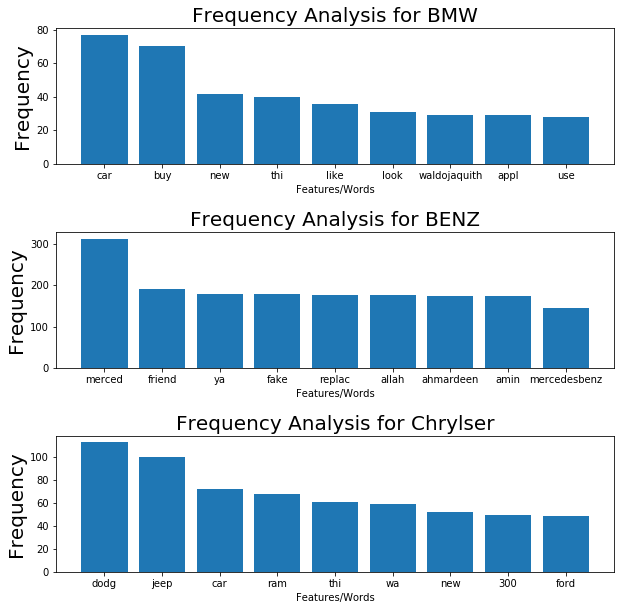

In [9]:
plt.figure(figsize=(10,10))

plt.subplot(3, 1, 1)
plt.bar(df_bmw_plot['features'], df_bmw_plot['counts'])
plt.title('Frequency Analysis for BMW', fontsize = 20)
plt.xlabel('Features/Words', fontsize = 10)
plt.ylabel('Frequency', fontsize = 20)




plt.subplot(3, 1, 2)
plt.bar(df_benz_plot['features'], df_benz_plot['counts'])
plt.title('Frequency Analysis for BENZ', fontsize = 20)
plt.xlabel('Features/Words', fontsize = 10)
plt.ylabel('Frequency', fontsize = 20)




plt.subplot(3, 1, 3)
plt.bar(df_chr_plot['features'], df_chr_plot['counts'])
plt.title('Frequency Analysis for Chrylser', fontsize = 20)
plt.xlabel('Features/Words', fontsize = 10)
plt.ylabel('Frequency', fontsize = 20)




plt.subplots_adjust(hspace=0.5);

#### **Analysis Report**

There were various keywords about BMW brand such as car, buy, new or use.  For Benz brand, different types of keywords showed up, for example, ahmardeen. This stands for a person who is celebrity in twitter. When it comes to chrylser, other brands appeared with this particular brand such as Jeep or Ford. This should taken into accout in further analysis. However, it is too early to determine if these keywords are used in a positive or negative context. 


## (2) Word2Vectorizer - Co-occurence Analysis with MDS Visualization

Word to Vectorizer is another text vectorzing technique machine learning yet more powerful one than bag of words or tf-idf method. Bag of words or TF-IDF only provides whether words appeared in document or not, ignoring context or subject of context. However Word to Vectorizer reflects this context information by intuitively mapping word data into vectors. This method allows people to store information about context and relationship among tokenized words. Showing these vector data with MDS, which is abbreviation of multidimensional scaling, people could easily see and understand which words are strongly related, and might infer what kind of context prevailed. 


For plotting MDS, there are two steps to complete. One is establishing a model with word2vectorizer and second step is to calculate proper number of clusters in each dataset with KMeans clustering method. these process are necesarray because MDS based on word2vectorizer and KMeans would provide deeper insight about what people are thinking and how to categorize people's opinion. Word2vectorizer is a vector containing similarity distances with directions. Of course, it is possible to map positions of words but that information is not enough regarding people's thoughts and opinions. By grouping those words based on the clusters inferred by KMeans method, MDS would contain similarity vectors of word dataset as well as which group use such words. 


### (2) - 1 Preparing for MDS Visualization


In [10]:
from nltk.tokenize import sent_tokenize

In [29]:
## importing necesarray packages for word2vector
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gensim.models as g
from gensim.models import word2vec

In [12]:
from sklearn.manifold import TSNE
import gensim 
import gensim.models as g


sentences_bmw = []
for i in df_group1.clean_text:
    com = i.split()
    sentences_bmw.append(com)

    
sentences_benz = []
for i in df_group2.clean_text:
    com = i.split()
    sentences_benz.append(com)
    
sentences_chr = []
for i in df_group3.clean_text:
    com = i.split()
    sentences_chr.append(com)


In [13]:
##setting parameters for word2vectors for efficient learning
min_word_count = 2
num_workers = 4 
context = 10 


# 모델 학습
model_bmw = word2vec.Word2Vec(sentences_bmw, 
                          workers=num_workers, 
                          min_count=min_word_count,
                          window=context)

model_benz = word2vec.Word2Vec(sentences_benz, 
                          workers=num_workers, 
                          min_count=min_word_count,
                          window=context)

model_chr = word2vec.Word2Vec(sentences_chr, 
                          workers=num_workers, 
                          min_count=min_word_count,
                          window=context)




model_name_bmw = 'bmw_mds'
model_bmw.save(model_name_bmw)

model_name_benz = 'benz_mds'
model_bmw.save(model_name_benz)

model_name_chr = 'chr_mds'
model_bmw.save(model_name_chr)





C:\Users\an-user\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [14]:

vocab_bmw = list(model_bmw.wv.vocab)
X_bmw = model_bmw[vocab_bmw]


vocab_benz = list(model_benz.wv.vocab)
X_benz = model_benz[vocab_benz]

vocab_chr = list(model_chr.wv.vocab)
X_chr = model_chr[vocab_chr]


print(len(X_bmw), X_bmw[0][:10], sep = '\n')
print(len(X_benz), X_benz[0][:10], sep = '\n')
print(len(X_chr), X_chr[0][:10], sep = '\n')


tsne = TSNE(n_components=2)

# Visualizing based on top 100 words
X_tsne_bmw = tsne.fit_transform(X_bmw[:100,:])
X_tsne_benz = tsne.fit_transform(X_benz[:100,:])
X_tsne_chr = tsne.fit_transform(X_chr[:100,:])

C:\Users\an-user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\an-user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\an-user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


574
[-0.00193548  0.00213019  0.00180888 -0.00712391  0.0014815  -0.0012667
 -0.00268046  0.00213181  0.00390482  0.00073524]
897
[ 0.03590824  0.03921817  0.09294558 -0.06599855 -0.00535338  0.0682492
  0.01220844  0.03514026 -0.011293   -0.01380276]
1284
[ 0.00723689  0.00403803  0.00866906  0.00245347 -0.00277505  0.00558953
 -0.00236861 -0.01650739  0.00719418 -0.00786455]


In [15]:
#Stroing data suitable for TNSE
df_bmw = pd.DataFrame(X_tsne_bmw, index=vocab_bmw[:100], columns=['x', 'y'])
df_benz = pd.DataFrame(X_tsne_benz, index=vocab_benz[:100], columns=['x', 'y'])
df_chr = pd.DataFrame(X_tsne_chr, index=vocab_chr[:100], columns=['x', 'y'])


print(df_bmw.shape, df_benz.shape, df_chr.shape, sep = '\n')

(100, 2)
(100, 2)
(100, 2)


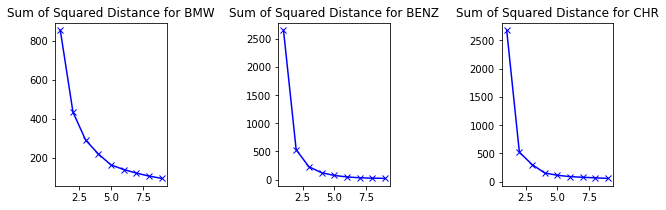

In [16]:
## Inferring Optimal Number of Clusters for Each Dataset

from sklearn.cluster import KMeans

K = range(1, 10)


ssd_bmw = []
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df_bmw)
    ssd_bmw.append(km.inertia_)


ssd_benz = []
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df_benz)
    ssd_benz.append(km.inertia_)



ssd_chr = []
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df_chr)
    ssd_chr.append(km.inertia_)
    
    
    
    
fig = plt.figure(figsize = (10, 3))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.plot(K, ssd_bmw, 'bx-')
ax1.set_title('Sum of Squared Distance for BMW')


ax2.plot(K, ssd_benz, 'bx-')
ax2.set_title('Sum of Squared Distance for BENZ')

ax3.plot(K, ssd_chr, 'bx-')
ax3.set_title('Sum of Squared Distance for CHR')

plt.subplots_adjust(wspace = 1)
plt.show();

#### **Analysis Report**

Based on KMeans analysis, optimal number of clusters for each dataset is observable. For BMW datset, it seems that 3 clusters could explain the distribution. Regarding Benz data, 2 clusters would be the best choice. In terms of Chrysler data, 2 clusters would do it. 



### (2) - 2 Presenting MDS Visualization 

### 1) TNSE for BMW

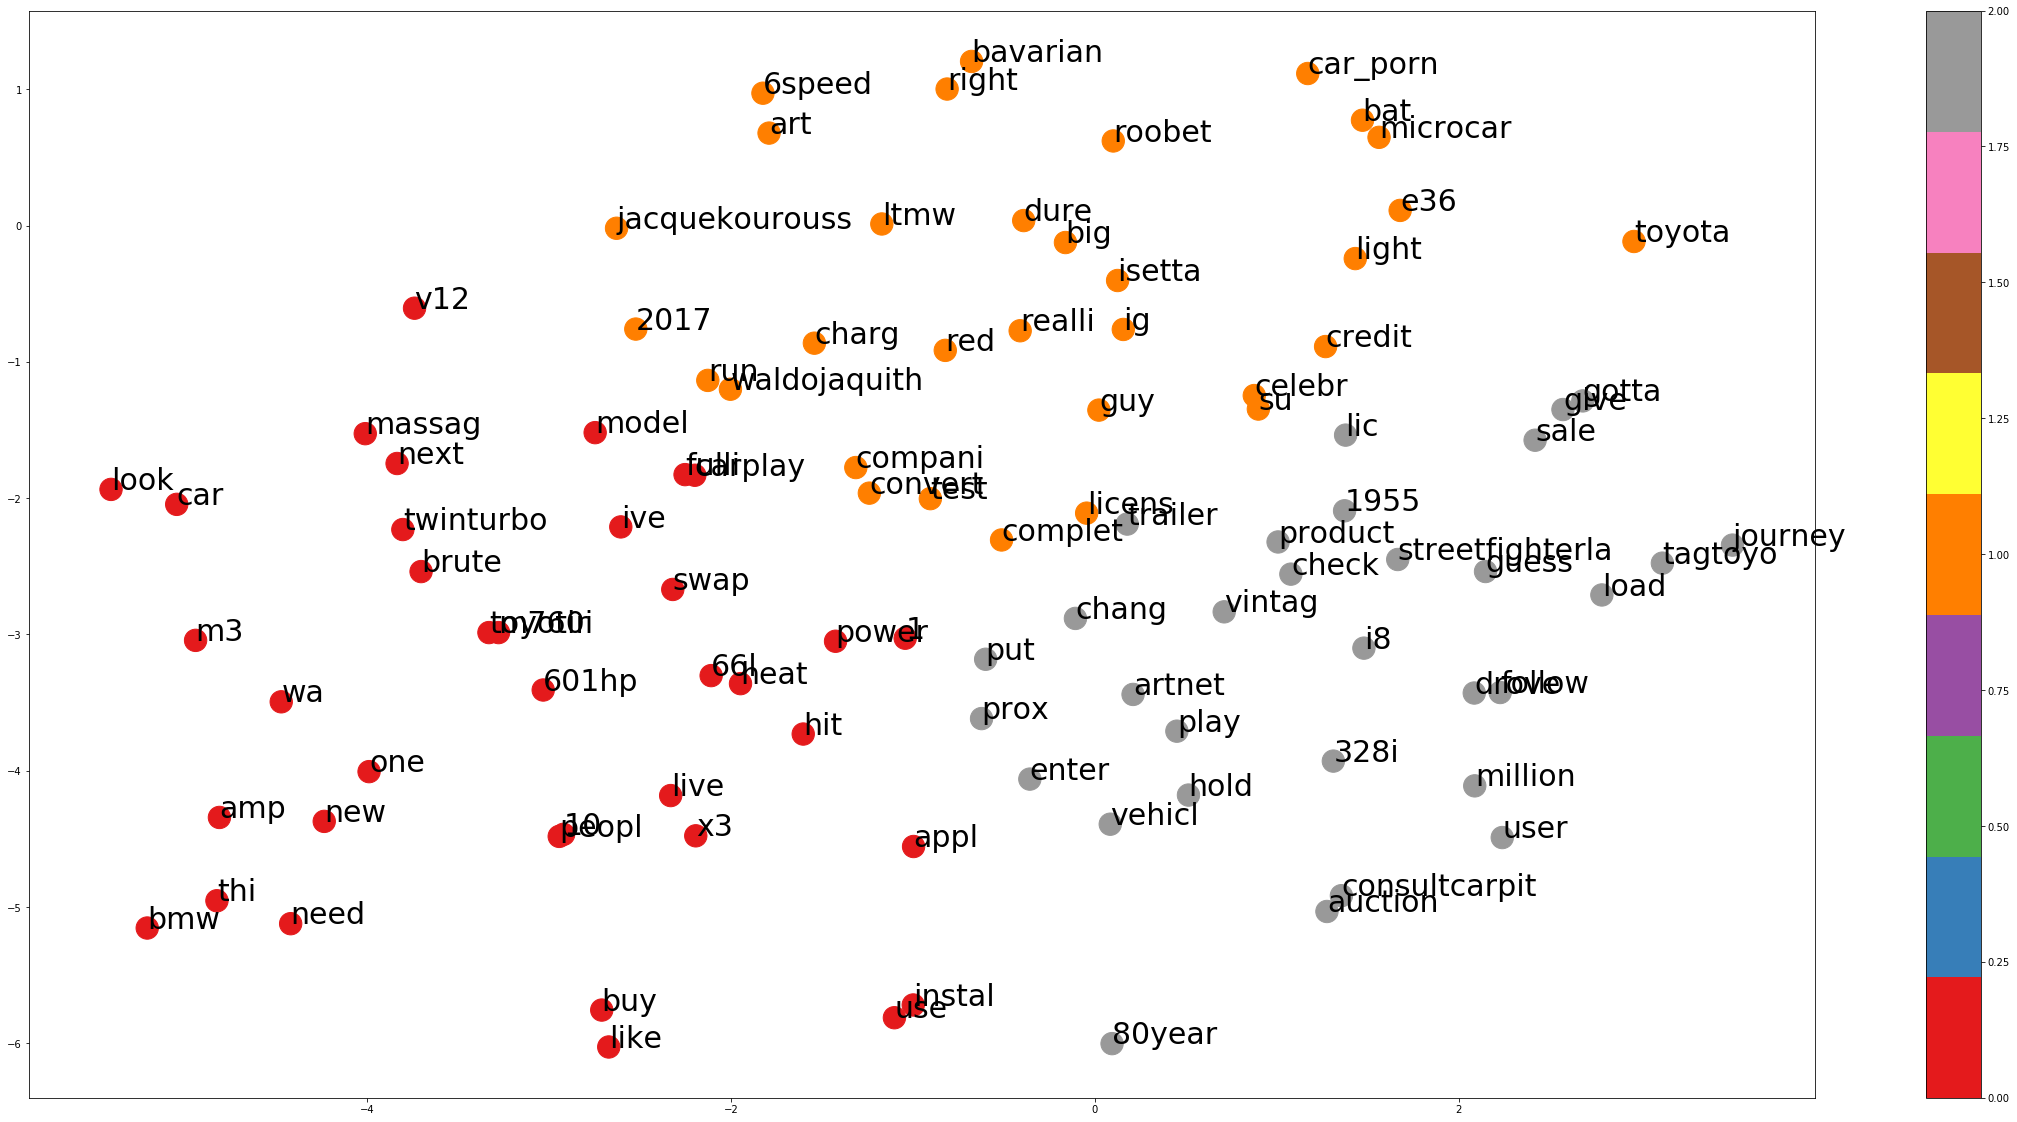

In [18]:
kmeans_bmw = KMeans(n_clusters = 3)
kmeans_bmw = kmeans_bmw.fit(df_bmw)
labels_bmw = kmeans_bmw.labels_


fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ss = ax.scatter(df_bmw['x'], df_bmw['y'], c = labels_bmw, s = 500, cmap = 'Set1')


for word, pos in df_bmw.iterrows():
    ax.annotate(word, pos, fontsize=30)

plt.colorbar(ss)
plt.show()

#### **Analysis Report**

In BMW data, three groups of words sets exists. In red group, many people talked about massage, next, model, twinturbo and so on. This means that many people are interested in next model which contains turbo engine and massage functioning chairs. Import point is that red group also mentioned keywords such as buy, like, need or use. This means that red group have the possiblity that they might be the potential customers in near future. 

Yellow groups seems to be not a potential customers yet, provide another opinion about the brand. There are various keywords and some of those are very concerning. For example, it is possible to know that some people correlate BMW with car porn, which is negative brand image. But at the same time, other people relate BMW with high-tech or luxury brand. This point is observable with keywords such as art, 6speed, ltmw. 

Gray group could be represented as people who think BMW with sentimental words. For example, keywords like 1955, vintage, streetfigher la. Espceically, we could guess that i8 or 328i models are more related to this keywords


### 2) TNSE for Benz

In [17]:
kmeans_benz = KMeans(n_clusters = 2)
kmeans_benz = kmeans_benz.fit(df_benz)
labels_benz = kmeans_benz.labels_

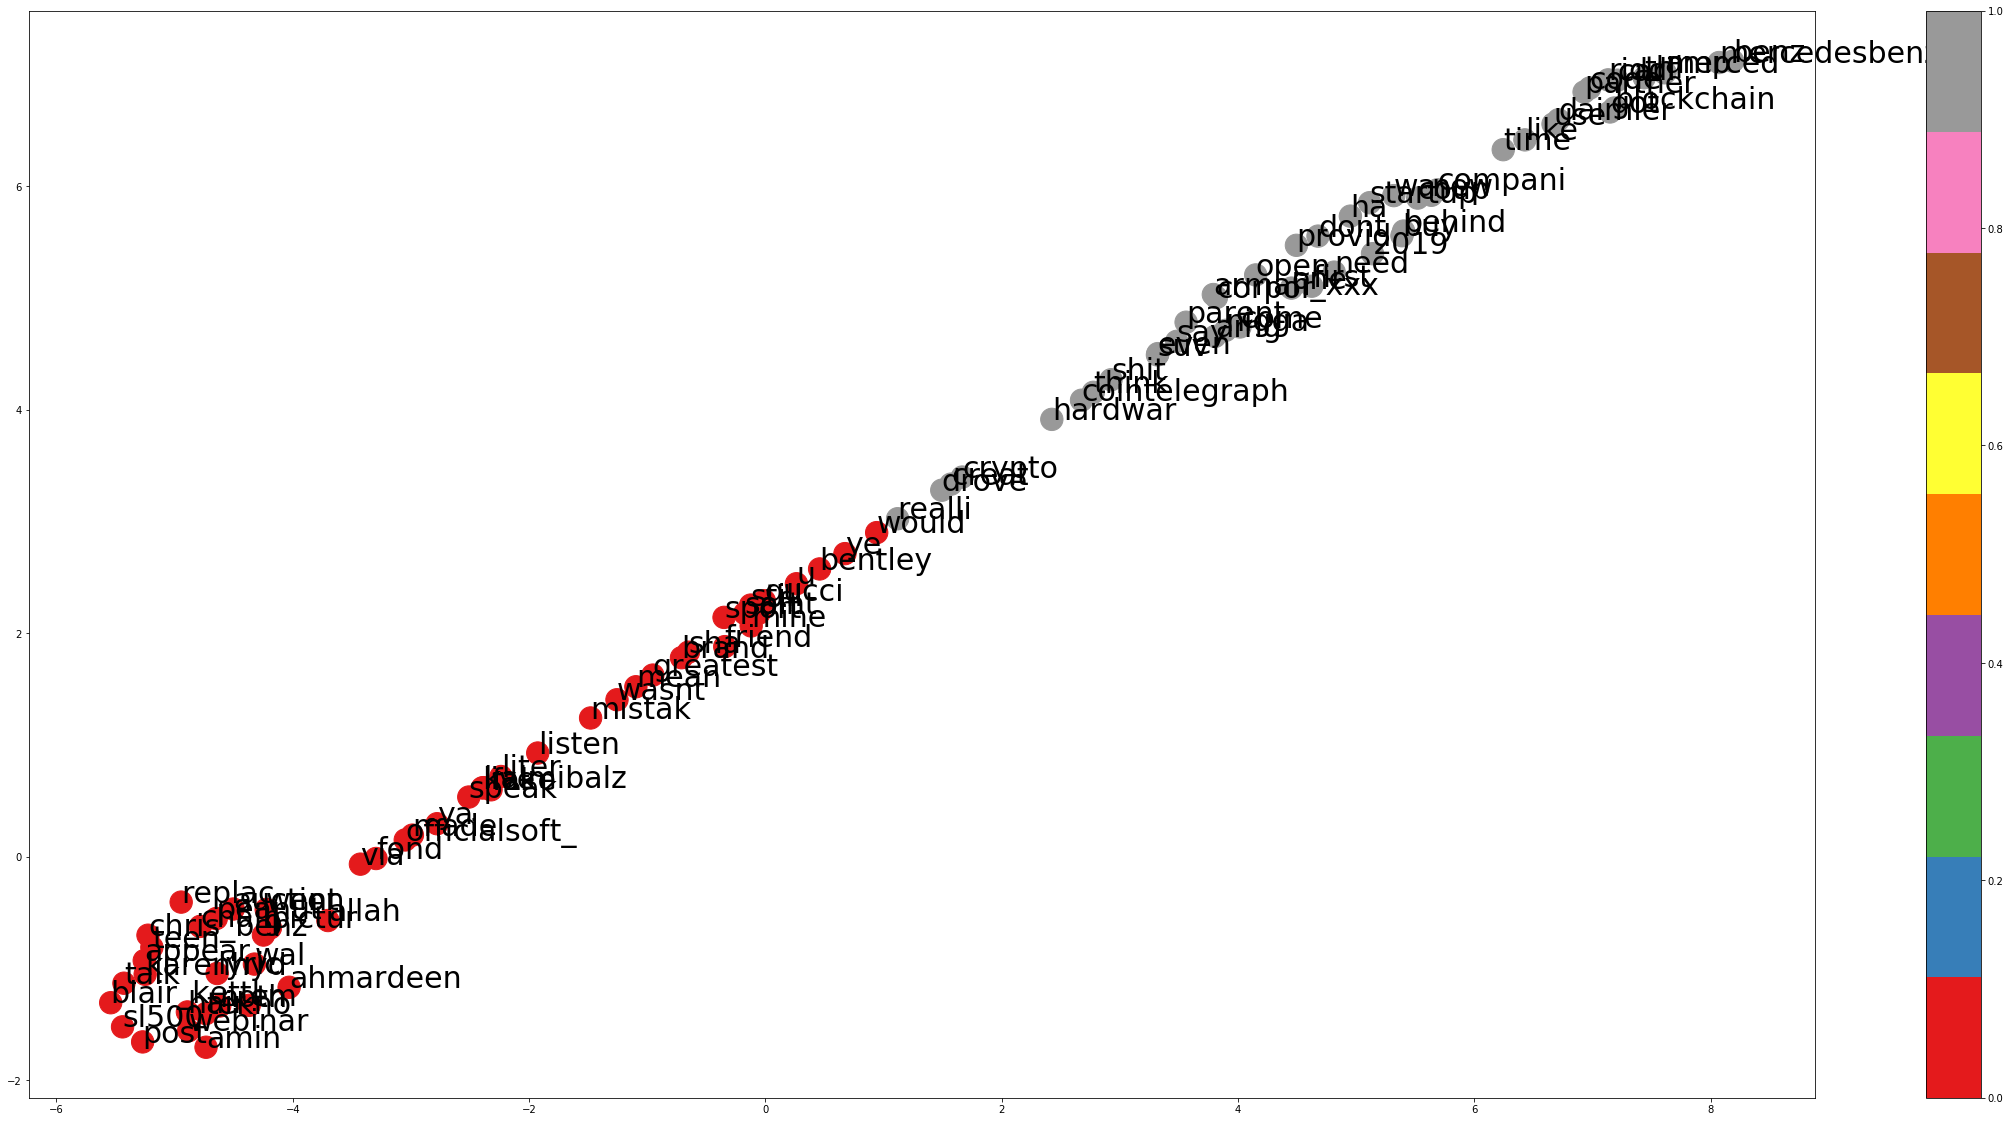

In [14]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ss = ax.scatter(df_benz['x'], df_benz['y'], c = labels_benz, s = 500, cmap = 'Set1')


for word, pos in df_benz.iterrows():
    ax.annotate(word, pos, fontsize=30)

plt.colorbar(ss)
plt.show()

#### **Analysis Report**
Benz data showed somewhat unique pattern. Certain parts are gathered as a cluster, but other words display linear equation format. Since cluster has meaning as word2vectorizer, only a circle part in red group is going to be dealt with in the analysis report. 

In the red cluster, ahmardeen posted a benz car image in Twitter, and it had been powerful opinion on the social media. Following url shows that certain twitter post (https://twitter.com/AhmarDeen/status/1152520833253937152). Many twitter user mentioned this certain post and reposted, which made a cluster in the red group.


### 3) TNSE for Chrylser

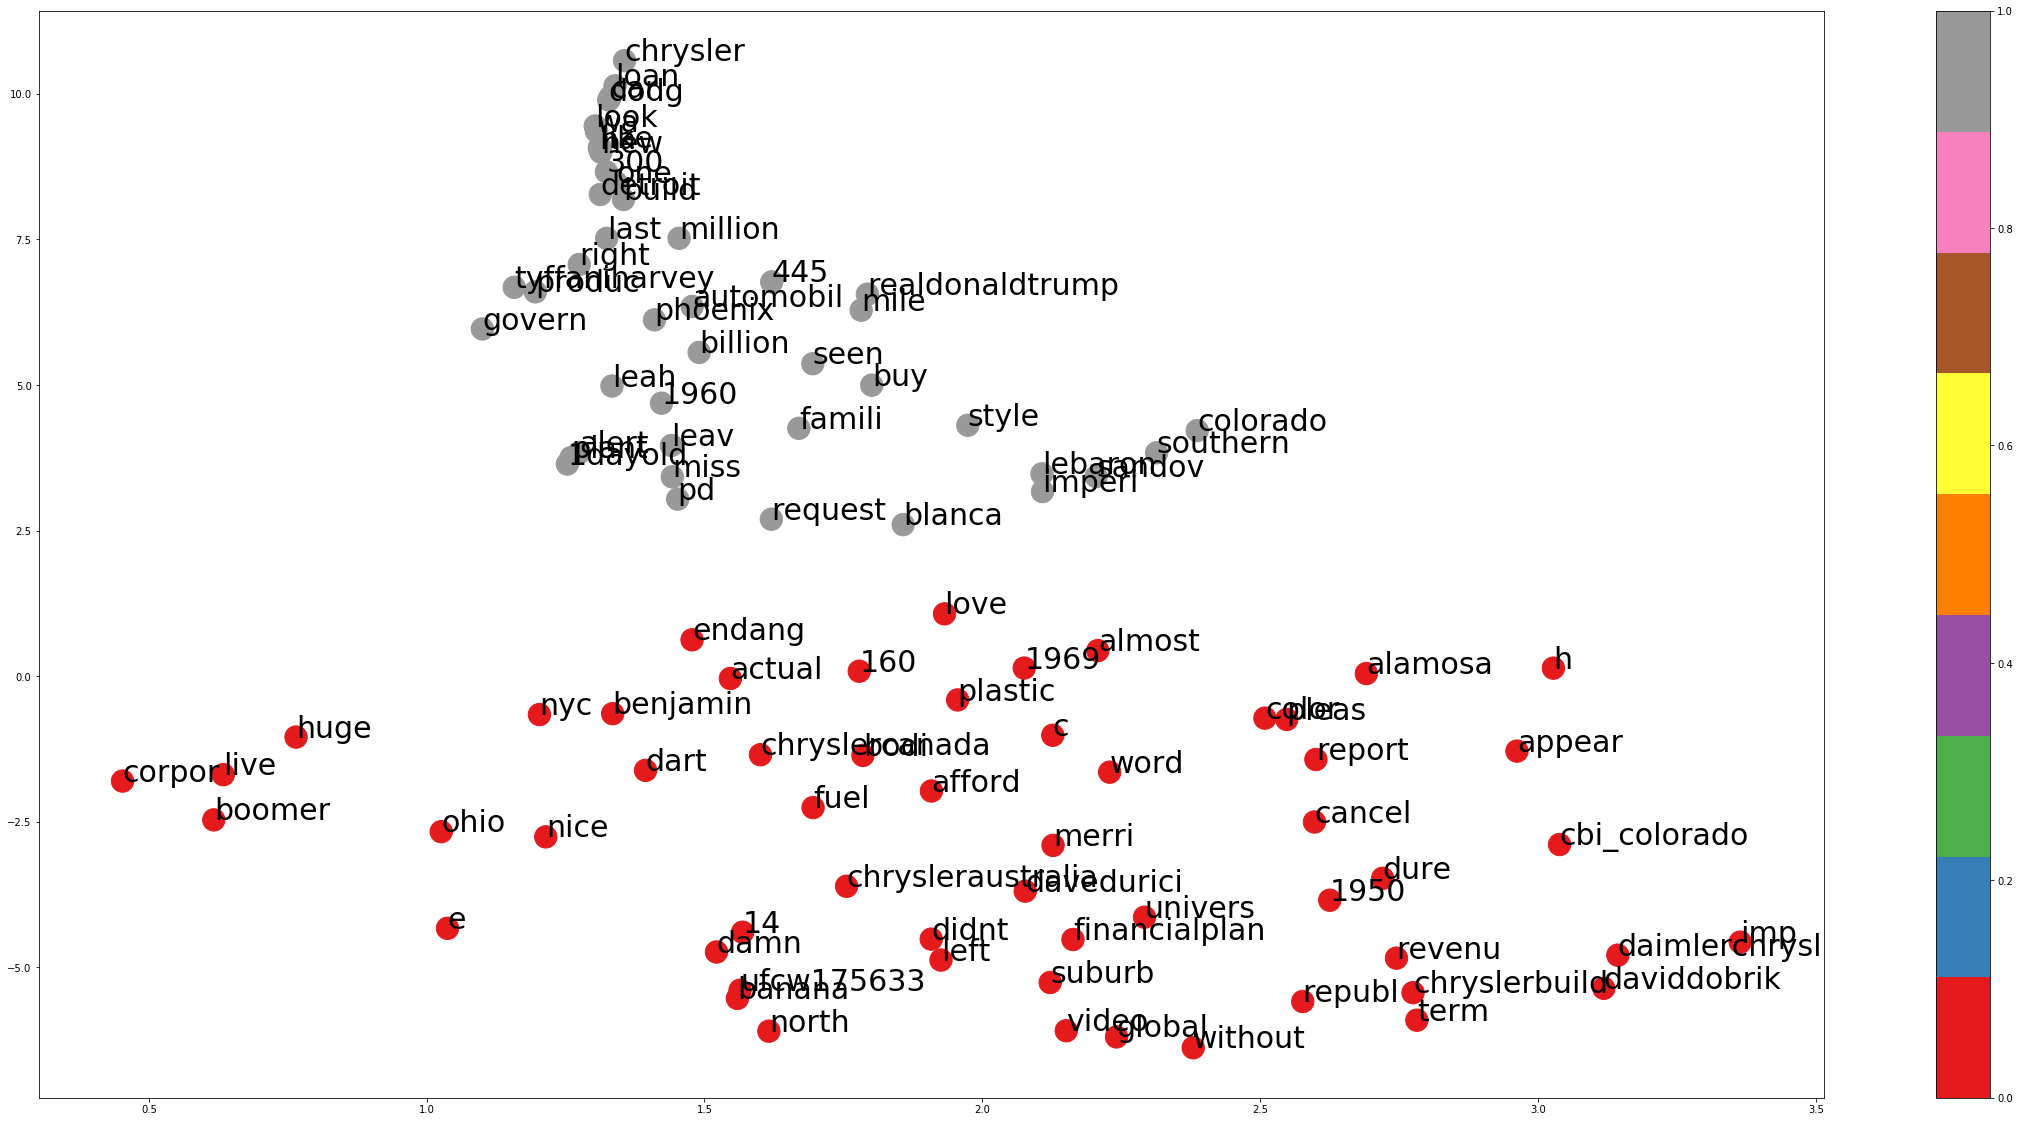

In [20]:
kmeans_chr = KMeans(n_clusters = 2)
kmeans_chr = kmeans_chr.fit(df_chr)
labels_chr = kmeans_chr.labels_


fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ss = ax.scatter(df_chr['x'], df_chr['y'], c = labels_chr, s = 500, cmap = 'Set1')


for word, pos in df_chr.iterrows():
    ax.annotate(word, pos, fontsize=30)

plt.colorbar(ss)
plt.show()

#### **Analysis Report**

There seems to be two clusters in chrylser dataset. In gray group, people tend to think of the brand as luxury yet a bit hard to purchase it. For example, keywords as loan, million, billion or due are correlated. Considering that this MDS is based on word2vectorizer, mapping relationship among words, those words are often commonly mentioned together. Moreover, the brand is perceived as a car which only celebrities uses. It it possible to see this insight from words as follows; realdonaldtrump, blanca, imperl and so on. 

Regarding red group, a number of people corelated chrysler brand with governmen department or certain region. For example, 'cbi_colorado' is close to word 'appear' or 'alamosa.' In addition, even in red group, financial part was considered, which could be observed from words 'financial plan', 'afford', 'fuel' and so on. 

To sump up the important point, chryler should consider its market position with financial part. Considering that it is more related to certain regions or government institution, marketers of the company should adjust their promotion or marketing plan. 


----------------------------------------------------------------------------------

## (3) Sentiment Analysis

The sentiment function of textblob returns two properties, polarity, and subjectivity. Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1] (Reference: https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/).


From sentiment score distribution, we could plot overall distribution of sentiment level for each data, calculate mean score and categorize into positive or negative label. As it was in the key thesis, projecting portions of positive and negative word count could provide insights about brand image. In addition, I would like to calculate mean sentiment score, and test whether this difference is statistically significant or not. 


#### (3) - 1 Sentiment Score Distribution

In [31]:
from textblob import TextBlob

##defining polarity and subjectivity funtion

def senti_polarity(x):
    return TextBlob(x).sentiment.polarity

def senti_subjectivity(x):
    return TextBlob(x).sentiment.subjectivity


## assigning polarity and subjectivity score of each dataset

df_group1['senti_score'] = df_group1['clean_text'].apply(senti_polarity)
df_group1['subjectivity_score'] = df_group1['clean_text'].apply(senti_subjectivity)


df_group2['senti_score'] = df_group2['clean_text'].apply(senti_polarity)
df_group2['subjectivity_score'] = df_group2['clean_text'].apply(senti_subjectivity)


df_group3['senti_score'] = df_group3['clean_text'].apply(senti_polarity)
df_group3['subjectivity_score'] = df_group3['clean_text'].apply(senti_subjectivity)

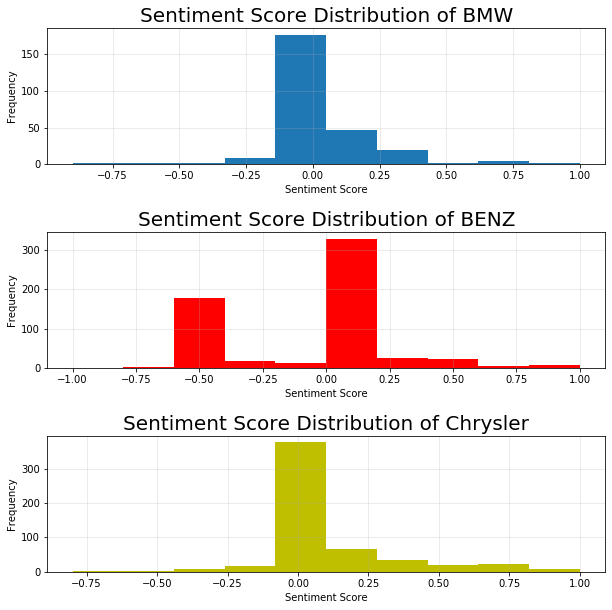

In [22]:
plt.rcParams["figure.figsize"] = (10,10)

plt.subplot(3, 1, 1)
plt.hist(df_group1['senti_score'])
plt.title("Sentiment Score Distribution of BMW", fontsize = 20)
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.grid(alpha = 0.3)




plt.subplot(3, 1, 2)
plt.hist(df_group2['senti_score'], color = 'r')
plt.title("Sentiment Score Distribution of BENZ", fontsize = 20)
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.grid(alpha = 0.3)


plt.subplot(3, 1, 3)
plt.hist(df_group3['senti_score'], color = 'y')
plt.title("Sentiment Score Distribution of Chrysler", fontsize = 20)
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.grid(alpha = 0.3)


plt.subplots_adjust(hspace=0.5);

#### (3) - 2 Sentiment Score Mean

In [23]:
print(df_group1['senti_score'].mean(),
     df_group2['senti_score'].mean(),
     df_group3['senti_score'].mean(),
     sep = '\n')

0.04875675713175716
-0.10152125490788279
0.09332477765601638


#### (3) - 3 Proportion of Positive and Negative Sentiment 

In [24]:
def pos_neg(x):
    if x > 0:
        x = 'pos'
    elif x < 0:
        x = 'neg'
    else:
        x = 'neut'
    return(x)

In [25]:
df_group1['preference'] = df_group1['senti_score'].apply(pos_neg)
df_group2['preference'] = df_group2['senti_score'].apply(pos_neg)
df_group3['preference'] = df_group3['senti_score'].apply(pos_neg)

In [26]:
df_group1 = df_group1.query('preference != "neut"')
df_group2 = df_group2.query('preference != "neut"')
df_group3 = df_group3.query('preference != "neut"')

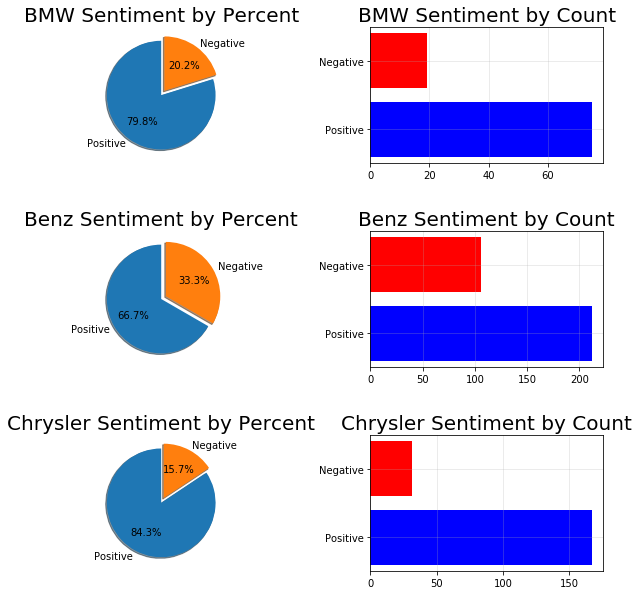

In [27]:
labels = ['Positive', 'Negative']
colors = ['b', 'r']

plt.rcParams["figure.figsize"] = (10,10)

plt.subplot(3, 2, 1)
plt.pie(df_group1.preference.value_counts(), labels = ['Positive', 'Negative'], explode = (0, 0.1),
        shadow = True, autopct= '%1.1f%%', startangle=90)
plt.title("BMW Sentiment by Percent", fontsize = 20)


plt.subplot(3, 2, 2)
plt.barh(labels, df_group1.preference.value_counts(), color = colors)
plt.title("BMW Sentiment by Count", fontsize = 20)
plt.grid(True, alpha = 0.3)


plt.subplot(3, 2, 3)
plt.pie(df_group2.preference.value_counts(), labels = ['Positive', 'Negative'], explode = (0, 0.1),
        shadow = True, autopct= '%1.1f%%', startangle=90)
plt.title("Benz Sentiment by Percent", fontsize = 20)


plt.subplot(3, 2, 4)
plt.barh(labels, df_group2.preference.value_counts(), color = colors)
plt.title("Benz Sentiment by Count", fontsize = 20)
plt.grid(True, alpha = 0.3)


plt.subplot(3, 2, 5)
plt.pie(df_group3.preference.value_counts(), labels = ['Positive', 'Negative'], explode = (0, 0.1),
        shadow = True, autopct= '%1.1f%%', startangle=90)
plt.title("Chrysler Sentiment by Percent", fontsize = 20)


plt.subplot(3, 2, 6)
plt.barh(labels, df_group3.preference.value_counts(), color = colors)
plt.title("Chrysler Sentiment by Count", fontsize = 20)
plt.grid(True, alpha = 0.3)


plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.5);

#### **Analysis Report**

It seems that Benz has the most negative perception than other two brands, whereas Chrysler reported positive sentiment portion among brands. This point gives insight that Chrysler is now the most preferred brand in market. In order to validate insight, next part would be hypothesis testing in terms of mean difference testing among three brands. 


#### (3) - 4 Hypothesis Testing / Mean Difference Test

**H0: Mean sentmentscore of Chrysler is same as or lower than mean sentiment score of other brands**

**H1: Mean sentmentscore of Chrysler is higher than mean sentiment scores of other brands**

In [28]:
## (1)Convert rate for p.new under the null & number of people on new page
group1_mean = df_group1['senti_score'].mean()
group1_count = df_group1.shape[0]
group1_std = np.std(df_group1['senti_score'])


## (2) Convert rate for old.new under the null & number of people on old page
group2_mean = df_group2['senti_score'].mean()
group2_count = df_group2.shape[0]
group2_std = np.std(df_group2['senti_score'])



group3_mean = df_group3['senti_score'].mean()
group3_count = df_group3.shape[0]
group3_std = np.std(df_group3['senti_score'])


actual_difference1 = group3_mean - group1_mean
actual_difference2 = group3_mean - group2_mean
print(group1_mean, group1_count, '/' ,group2_mean, group2_count, '/', group3_mean, group2_count)
print(actual_difference1, actual_difference2)

0.1348591154708177 94 / -0.19218803602058315 318 / 0.26253485431515716 318
0.12767573884433947 0.4547228903357403


In [29]:
##Stimulating group1's distribution under the null.
group1 = np.random.normal(group1_mean, group1_std, group1_count).mean()


##Stimulating group2's distribution under the null.
group2 = np.random.normal(group2_mean, group2_std, group2_count).mean()


##Stimulating group2's distribution under the null.
group3 = np.random.normal(group3_mean, group3_std, group3_count).mean()


##Difference between the above two values
possbility_difference1 = group3 - group1
possbility_difference2 = group3 - group1

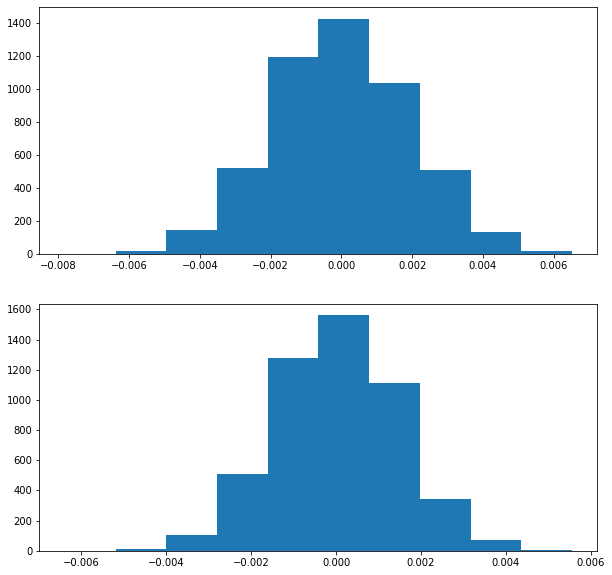

In [30]:
p_diffs1 = np.random.normal(group3_count, group3_mean, 5000)/group3_count - np.random.normal(group1_count, group1_mean, 5000)/group1_count
p_diffs1 = np.array(p_diffs1)

p_diffs2 = np.random.normal(group3_count, group3_mean, 5000)/group3_count - np.random.normal(group2_count, group2_mean*(-1), 5000)/group2_count
p_diffs2 = np.array(p_diffs2)



plt.subplot(2,1,1)
plt.hist(p_diffs1)



plt.subplot(2,1,2)
plt.hist(p_diffs2);

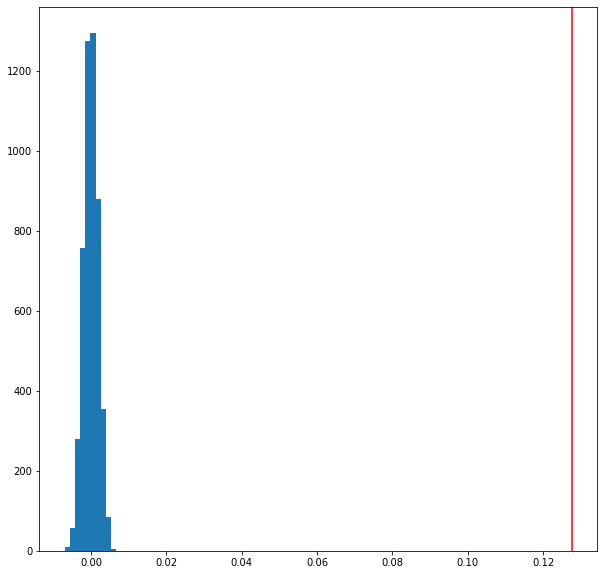

In [31]:
null_vals1 = np.random.normal(0, p_diffs1.std(), p_diffs1.size)
null_vals2 = np.random.normal(0, p_diffs2.std(), p_diffs2.size)

plt.hist(null_vals1)
plt.axvline(actual_difference1, color = 'red');

In [32]:
p_value1 = (null_vals1 > actual_difference1).mean()
p_value2 = (null_vals2 > actual_difference2).mean()
print(p_value1, p_value2)

0.0 0.0


#### **Analysis Report**

From mean calculation and proportion of positive and negative, chrysler showed the most positive result and hypothesis testing result provided an evidence that this point is statistically significant. In summary, Chrysler's brand image is much better than other two brands and the company could take advantage from this point. 

-------------------------

## 4. Report Summary

Text data collected on Twitter is used for sentiment analysis. After clenaing raw data, sentiment analyis for BMW, Benz and Chrysler was conducted. It turns out that there are clusters of opinions of each brand. For BMW, there were three opinion groups, two for Benz and Chrysler. In order to provide deeper insight into sentiment of each brand, sentiment scores were calculated. Chrysler brand has shown the most positive result whereas Benz displayed the worst. This difference is not only meaningful in visual part but also signficant in terms of hypothesis testing. As a result, Benz showed analyze what was wrong for their brand sentiment by taking a look of word count or word2vectorizer model, and Chrylser should come up with marketing strategy that could maximize this advantageous market position